In [91]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings
warnings.filterwarnings("ignore") 
import re 
import nltk 
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud
from nltk.stem import PorterStemmer , WordNetLemmatizer 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score , classification_report , confusion_matrix
from sklearn.feature_extraction.text import CountVectorizer 
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier

In [27]:
!pip install wordcloud

   ---------------------------------------- 0.0/301.2 kB ? eta -:--:--
   - -------------------------------------- 10.2/301.2 kB ? eta -:--:--
   --- ----------------------------------- 30.7/301.2 kB 435.7 kB/s eta 0:00:01
   --------- ----------------------------- 71.7/301.2 kB 563.7 kB/s eta 0:00:01
   --------------------------------- ------ 256.0/301.2 kB 1.6 MB/s eta 0:00:01
   ---------------------------------------- 301.2/301.2 kB 1.6 MB/s eta 0:00:00


In [2]:
pwd

'C:\\Users\\trini\\DMML_project\\codes'

In [92]:
tweets = pd.read_csv("C:\\Users\\trini\\DMML_project\\Datasets\\twitter_training.csv")
tweets

,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,"
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...
...,...,...,...,...
74676,9200,Nvidia,Positive,Just realized that the Windows partition of my...
74677,9200,Nvidia,Positive,Just realized that my Mac window partition is ...
74678,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...
74679,9200,Nvidia,Positive,Just realized between the windows partition of...


In [93]:
df=tweets.copy()
df

,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,"
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...
...,...,...,...,...
74676,9200,Nvidia,Positive,Just realized that the Windows partition of my...
74677,9200,Nvidia,Positive,Just realized that my Mac window partition is ...
74678,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...
74679,9200,Nvidia,Positive,Just realized between the windows partition of...


In [94]:
df.shape

(74681, 4)

In [31]:
nltk.download("stopwords")
nltk.download("words")
nltk.download("punkt")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\trini\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\trini\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\words.zip.
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\trini\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [95]:
name_columns = ["Id" , "Entity" , "Target" , "Text"]
df = pd.read_csv("C:\\Users\\trini\\DMML_project\\Datasets\\twitter_training.csv" ,names= name_columns)
df

,Id,Entity,Target,Text
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
...,...,...,...,...
74677,9200,Nvidia,Positive,Just realized that the Windows partition of my...
74678,9200,Nvidia,Positive,Just realized that my Mac window partition is ...
74679,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...
74680,9200,Nvidia,Positive,Just realized between the windows partition of...


In [96]:
df.describe()

,Id
count,74682.000000
mean,6432.586165
std,3740.427870
min,1.000000
25%,3195.000000
50%,6422.000000
75%,9601.000000
max,13200.000000


In [97]:
df["Text"][17]

'I-Hard like me, RARE LONDON DE, HANDSOME 2011, Borderlands 3 (Xbox) dlvr.it/RMTrgF'

In [98]:
df["Target"].unique()

array(['Positive', 'Neutral', 'Negative', 'Irrelevant'], dtype=object)

In [99]:
df["Target"].value_counts(ascending = True)

Target
Irrelevant    12990
Neutral       18318
Positive      20832
Negative      22542
Name: count, dtype: int64

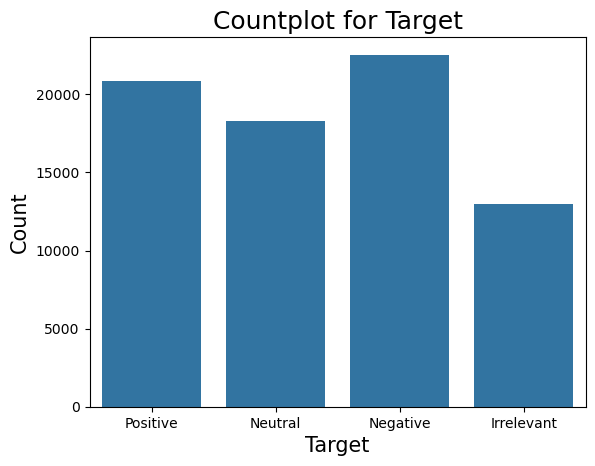

In [101]:
# plt.figure(figsize = (8,6))
sns.countplot(x = "Target" , data = df)
plt.title("Countplot for Target" , fontsize = 18)
plt.xlabel("Target" , fontsize = 15 )
plt.ylabel("Count" , fontsize = 15 )
plt.show()

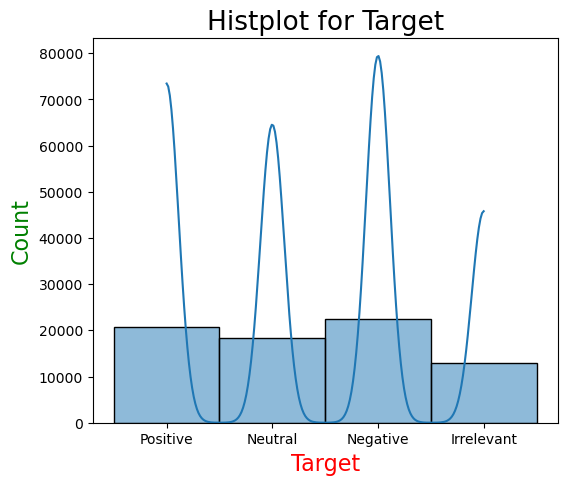

In [40]:
plt.figure(figsize = (6,5))
sns.histplot(x="Target" , kde = True , bins = 30 , data = df)
plt.title("Histplot for Target" , fontsize = 19 , c="k")
plt.xlabel("Target" , fontsize = 16 , c="r")
plt.ylabel("Count" , fontsize = 16 , c="g")
plt.show()

In [102]:
df["Entity"].unique()

array(['Borderlands', 'CallOfDutyBlackopsColdWar', 'Amazon', 'Overwatch',
       'Xbox(Xseries)', 'NBA2K', 'Dota2', 'PlayStation5(PS5)',
       'WorldOfCraft', 'CS-GO', 'Google', 'AssassinsCreed', 'ApexLegends',
       'LeagueOfLegends', 'Fortnite', 'Microsoft', 'Hearthstone',
       'Battlefield', 'PlayerUnknownsBattlegrounds(PUBG)', 'Verizon',
       'HomeDepot', 'FIFA', 'RedDeadRedemption(RDR)', 'CallOfDuty',
       'TomClancysRainbowSix', 'Facebook', 'GrandTheftAuto(GTA)',
       'MaddenNFL', 'johnson&johnson', 'Cyberpunk2077',
       'TomClancysGhostRecon', 'Nvidia'], dtype=object)

In [103]:
b = df["Entity"].value_counts(ascending = True)
b

Entity
AssassinsCreed                       2244
RedDeadRedemption(RDR)               2262
PlayerUnknownsBattlegrounds(PUBG)    2274
Fortnite                             2274
Borderlands                          2286
Hearthstone                          2298
Google                               2298
Nvidia                               2298
CS-GO                                2304
Cyberpunk2077                        2304
GrandTheftAuto(GTA)                  2304
PlayStation5(PS5)                    2310
HomeDepot                            2310
Amazon                               2316
johnson&johnson                      2328
Overwatch                            2334
Xbox(Xseries)                        2334
FIFA                                 2340
TomClancysGhostRecon                 2346
Battlefield                          2346
NBA2K                                2352
WorldOfCraft                         2364
Dota2                                2364
Facebook                   

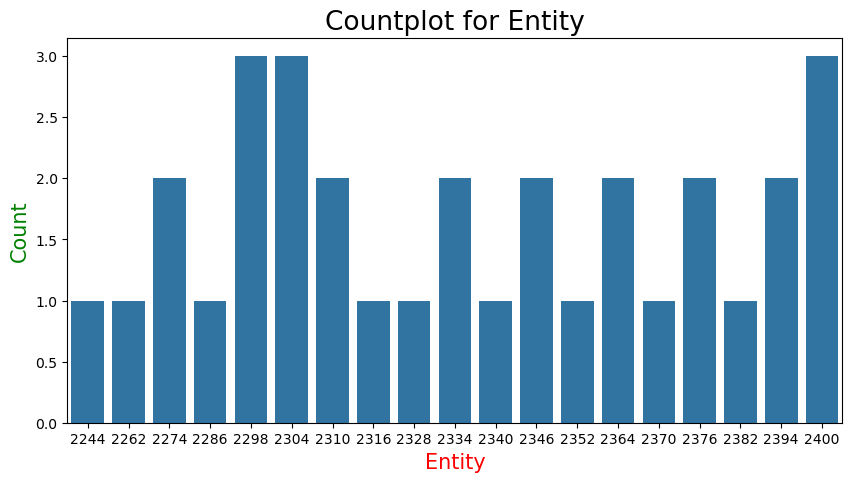

In [109]:
## Count plot for Entity

plt.figure(figsize = (10,5))
sns.countplot(x = b , data = df)
plt.title("Countplot for Entity" , fontsize = 19 , c = "k")
plt.xlabel("Entity" , fontsize = 15 , c = "r")
plt.ylabel("Count" , fontsize = 15 , c = "g")
plt.show()

In [44]:
df.groupby("Id")["Entity"].sum()

Id
1                     AmazonAmazonAmazonAmazonAmazonAmazon
2                     AmazonAmazonAmazonAmazonAmazonAmazon
3                     AmazonAmazonAmazonAmazonAmazonAmazon
4                     AmazonAmazonAmazonAmazonAmazonAmazon
5                     AmazonAmazonAmazonAmazonAmazonAmazon
                               ...                        
13196    Xbox(Xseries)Xbox(Xseries)Xbox(Xseries)Xbox(Xs...
13197    Xbox(Xseries)Xbox(Xseries)Xbox(Xseries)Xbox(Xs...
13198    Xbox(Xseries)Xbox(Xseries)Xbox(Xseries)Xbox(Xs...
13199    Xbox(Xseries)Xbox(Xseries)Xbox(Xseries)Xbox(Xs...
13200    Xbox(Xseries)Xbox(Xseries)Xbox(Xseries)Xbox(Xs...
Name: Entity, Length: 12447, dtype: object

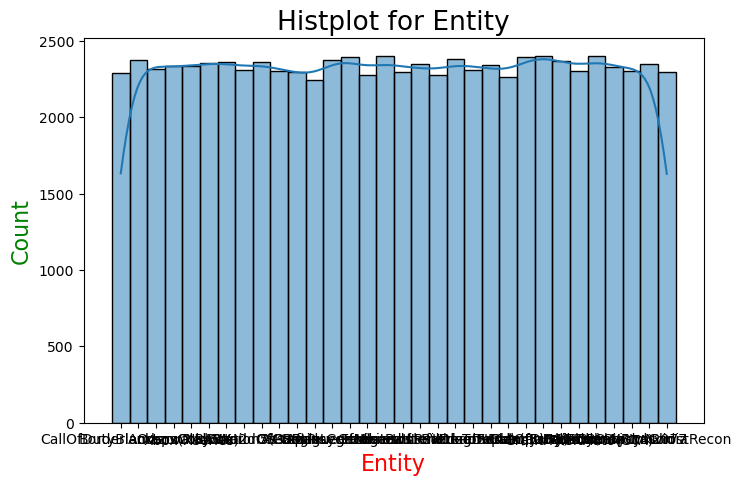

In [45]:
## Histplot for Entity

plt.figure(figsize = (8,5))
sns.histplot(x="Entity" , kde = True , bins = 20  , data = df )
plt.title("Histplot for Entity" , fontsize = 19 , c="k")
plt.xlabel("Entity" , fontsize = 16 , c="r")
plt.ylabel("Count" , fontsize = 16 , c="g")
plt.show()

<Figure size 3000x500 with 0 Axes>

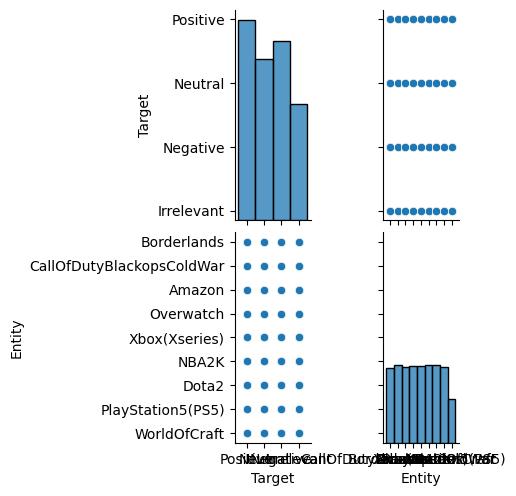

In [112]:
plt.figure(figsize = (30 , 5))
sns.pairplot(df[10:20000] , vars = ["Target" , "Entity"] )
plt.show()

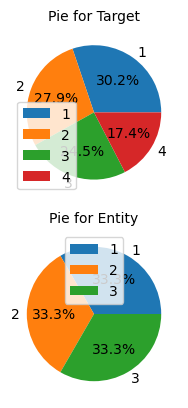

In [47]:
## Pie for Target and Entity columns

y1 = df["Target"].value_counts()
labels = ["1" , "2" , "3" , "4"]
plt.subplot(2,1,1)
plt.pie(y1 , labels = labels , autopct = "%1.1f%%")
plt.legend()
plt.title("Pie for Target" , fontsize = 10 , c = "k")


y2 = df["Entity"].value_counts().head(3)
labels = ["1" , "2" , "3"]
plt.subplot(2,1,2)
plt.pie(y2 , labels = labels , autopct = "%1.1f%%")
plt.legend()
plt.title("Pie for Entity" , fontsize = 10 , c = "k")

plt.show()

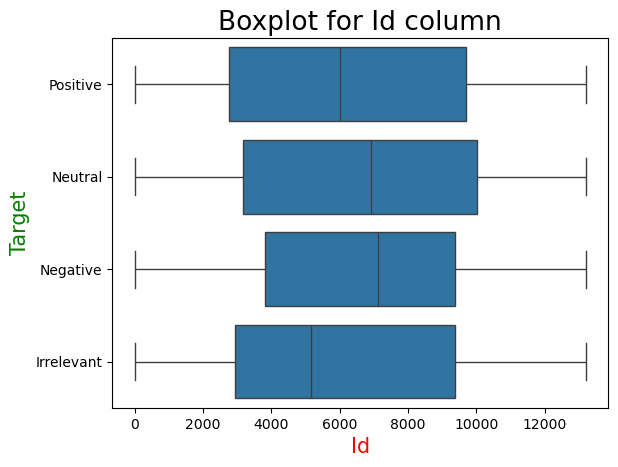

In [48]:
sns.boxplot(data = df , x = "Id" , y = "Target")
plt.xlabel("Id" , fontsize = 15 , c = "r")
plt.ylabel("Target" , fontsize = 15 , c = "g")
plt.title("Boxplot for Id column" , fontsize = 19 , c = "k")
plt.show()

In [49]:
df["Id"].max()

13200

In [50]:
df.isnull().sum()

Id          0
Entity      0
Target      0
Text      686
dtype: int64

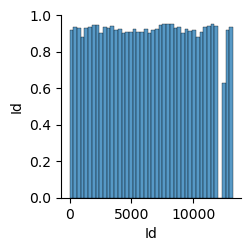

In [51]:
sns.pairplot(df)
plt.show()

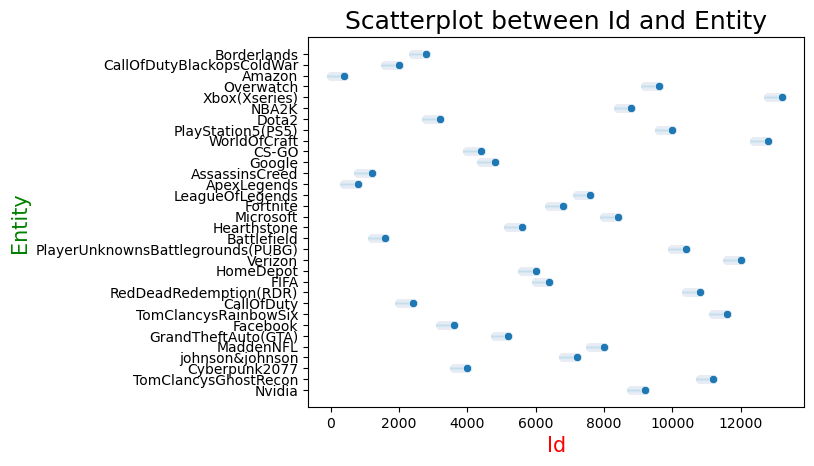

In [115]:
# plt.figure(figsize = (6, 4))
sns.scatterplot(x = df["Id"] , y = df["Entity"])
plt.xlabel("Id" , fontsize = 15 , c = "r")
plt.ylabel("Entity" , fontsize = 15 , c = "g")
plt.title("Scatterplot between Id and Entity" , fontsize = 18 , c = "k")
plt.show()

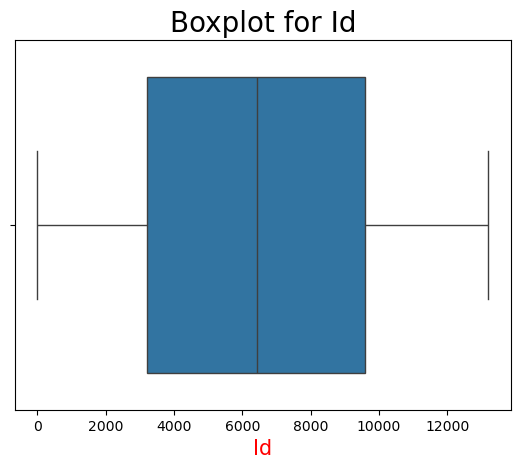

In [53]:
## Boxplot for Id

sns.boxplot(x = "Id" , data =df)
plt.xlabel("Id" , fontsize = 15 , c = "r")
plt.title("Boxplot for Id" , fontsize = 20 , c = "k")
plt.show()

In [54]:
df["Text"].value_counts()

Text
At the same time, despite the fact that there are currently some 100 million people living below the poverty line, most of them do not have access to health services and do not have access to health care, while most of them do not have access to health care.    172
It is not the first time that the EU Commission has taken such a step.                                                                                                                                                                                                172
                                                                                                                                                                                                                                                                      172
<unk>                                                                                                                                                                                                

In [57]:
df.duplicated().sum()

2700

In [59]:
# process the missing values
df["Text"].fillna("unknown" , inplace = True) 

In [62]:
# Preprocessing on Text
def process_Text(Text):
        Text = Text.lower()  
        Text = re.sub(r"[^\w\s]" , "" , Text)
        Text = re.sub(r"\d+" , "" , Text)
        tokens = word_tokenize(Text)
        stop_words = set(stopwords.words("english"))
        tokens = [word for word in tokens if word not in stop_words]
        lemmatizer = WordNetLemmatizer()
        lemmatize_tokens = [lemmatizer.lemmatize(token) for token in tokens]
        return " ".join(lemmatize_tokens)

In [63]:
import nltk
nltk.download('wordnet')
nltk.download('wordnet2022')
# ! cp -rf /usr/share/nltk_data/corpora/wordnet2022 /usr/share/nltk_data/corpora/wordnet # temp fix for lookup error.

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\trini\AppData\Roaming\nltk_data...
[nltk_data] Downloading package wordnet2022 to
[nltk_data]     C:\Users\trini\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\wordnet2022.zip.
'cp' is not recognized as an internal or external command,
operable program or batch file.


In [65]:
df["processed_Text"] = df["Text"].apply(process_Text)
df["processed_Text"]

0                             im getting borderland murder
1                                       coming border kill
2                               im getting borderland kill
3                              im coming borderland murder
4                             im getting borderland murder
                               ...                        
74677    realized window partition mac like year behind...
74678    realized mac window partition year behind nvid...
74679    realized window partition mac year behind nvid...
74680    realized window partition mac like year behind...
74681    like window partition mac like year behind dri...
Name: processed_Text, Length: 74682, dtype: object

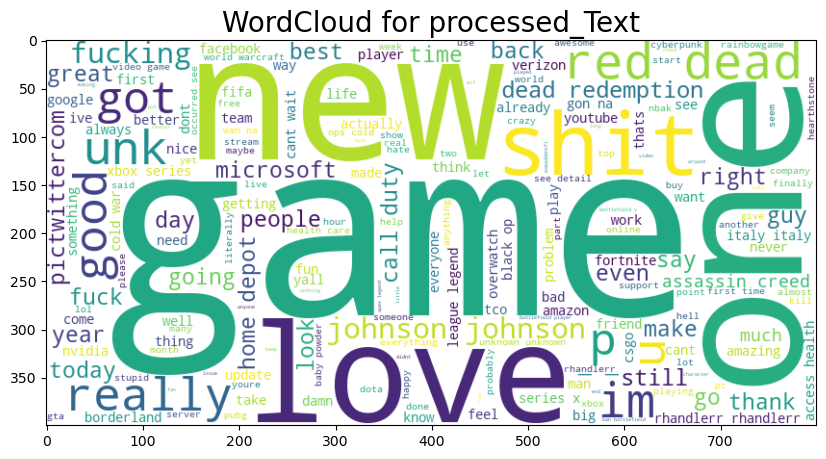

In [66]:
all_text = " ".join(df["processed_Text"].astype(str))
wordcloud = WordCloud(height = 400 , width = 800 , background_color = "white").generate(all_text)
plt.figure(figsize = (10,5))
plt.title("WordCloud for processed_Text" , fontsize = 20 , c = "k")
plt.imshow(wordcloud , interpolation = "bilinear")
plt.show()

In [67]:
df["processed_Text"][17]

'ihard like rare london de handsome borderland xbox dlvritrmtrgf'

In [68]:
from sklearn.preprocessing import LabelEncoder

Encoder = LabelEncoder()

df["Target"] = Encoder.fit_transform(df["Target"])
df["Target"]

0        3
1        3
2        3
3        3
4        3
        ..
74677    3
74678    3
74679    3
74680    3
74681    3
Name: Target, Length: 74682, dtype: int32

In [69]:
df["Target"].unique()

array([3, 2, 1, 0])

In [70]:
count_vector = CountVectorizer(max_features = 5000)
x_count = count_vector.fit_transform(df["processed_Text"])
x_count

<74682x5000 sparse matrix of type '<class 'numpy.int64'>'
	with 641373 stored elements in Compressed Sparse Row format>

In [71]:
x_count_dense = x_count.toarray()
x_count_dense

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [72]:
df["Target"].unique()

array([3, 2, 1, 0])

In [73]:
df.head(10).style.background_gradient(cmap = "Blues")

,Id,Entity,Target,Text,processed_Text
0,2401,Borderlands,3,"im getting on borderlands and i will murder you all ,",im getting borderland murder
1,2401,Borderlands,3,"I am coming to the borders and I will kill you all,",coming border kill
2,2401,Borderlands,3,"im getting on borderlands and i will kill you all,",im getting borderland kill
3,2401,Borderlands,3,"im coming on borderlands and i will murder you all,",im coming borderland murder
4,2401,Borderlands,3,"im getting on borderlands 2 and i will murder you me all,",im getting borderland murder
5,2401,Borderlands,3,"im getting into borderlands and i can murder you all,",im getting borderland murder
6,2402,Borderlands,3,So I spent a few hours making something for fun. . . If you don't know I am a HUGE @Borderlands fan and Maya is one of my favorite characters. So I decided to make myself a wallpaper for my PC. . Here is the original image versus the creation I made :) Enjoy! pic.twitter.com/mLsI5wf9Jg,spent hour making something fun dont know huge borderland fan maya one favorite character decided make wallpaper pc original image versus creation made enjoy pictwittercommlsiwfjg
7,2402,Borderlands,3,"So I spent a couple of hours doing something for fun... If you don't know that I'm a huge @ Borderlands fan and Maya is one of my favorite characters, I decided to make a wallpaper for my PC.. Here's the original picture compared to the creation I made:) Have fun! pic.twitter.com / mLsI5wf9Jg",spent couple hour something fun dont know im huge borderland fan maya one favorite character decided make wallpaper pc here original picture compared creation made fun pictwittercom mlsiwfjg
8,2402,Borderlands,3,So I spent a few hours doing something for fun... If you don't know I'm a HUGE @ Borderlands fan and Maya is one of my favorite characters.,spent hour something fun dont know im huge borderland fan maya one favorite character
9,2402,Borderlands,3,So I spent a few hours making something for fun. . . If you don't know I am a HUGE RhandlerR fan and Maya is one of my favorite characters. So I decided to make myself a wallpaper for my PC. . Here is the original image versus the creation I made :) Enjoy! pic.twitter.com/mLsI5wf9Jg,spent hour making something fun dont know huge rhandlerr fan maya one favorite character decided make wallpaper pc original image versus creation made enjoy pictwittercommlsiwfjg


In [74]:
data = df.drop("Text" , axis = 1)
data

,Id,Entity,Target,processed_Text
0,2401,Borderlands,3,im getting borderland murder
1,2401,Borderlands,3,coming border kill
2,2401,Borderlands,3,im getting borderland kill
3,2401,Borderlands,3,im coming borderland murder
4,2401,Borderlands,3,im getting borderland murder
...,...,...,...,...
74677,9200,Nvidia,3,realized window partition mac like year behind...
74678,9200,Nvidia,3,realized mac window partition year behind nvid...
74679,9200,Nvidia,3,realized window partition mac year behind nvid...
74680,9200,Nvidia,3,realized window partition mac like year behind...


In [75]:
# Split Data to X and y
X = x_count_dense[:3000]
y = df["Target"][:3000]

In [76]:
x_train , x_test , y_train , y_test = train_test_split(X , y , test_size = 0.2 , 
                                                      shuffle = True , random_state = 42)

In [77]:
print("x_train shape" , x_train.shape)
print("x_test shape" , x_test.shape)
print("y_train shape" , y_train.shape)
print("y_test shape" , y_test.shape)

x_train shape (2400, 5000)
x_test shape (600, 5000)
y_train shape (2400,)
y_test shape (600,)


decision_tree_score 0.975
accuracy_dt : 0.8133333333333334
report               precision    recall  f1-score   support

           0       0.83      0.81      0.82        93
           1       0.80      0.82      0.81       118
           2       0.82      0.79      0.81       144
           3       0.81      0.82      0.82       245

    accuracy                           0.81       600
   macro avg       0.81      0.81      0.81       600
weighted avg       0.81      0.81      0.81       600

cm_dt : [[ 75   3   3  12]
 [  4  97   4  13]
 [  1   7 114  22]
 [ 10  15  18 202]]


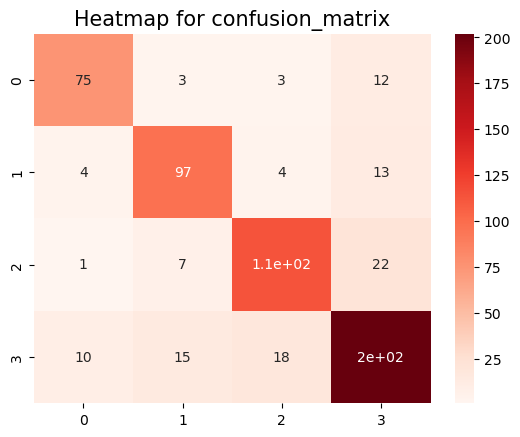

In [78]:
# Build Models
## DecisionTreeClassifier

decision_tree = DecisionTreeClassifier()
decision_tree.fit(x_train , y_train)
## score for decisiontree
decision_tree_score = decision_tree.score(x_train , y_train)
print("decision_tree_score" , decision_tree_score)
## y_pred
y_pred_decision_tree = decision_tree.predict(x_test)
## accuracy for decisiontree
accuracy_dt = accuracy_score(y_test , y_pred_decision_tree)
print("accuracy_dt :" , accuracy_dt)
## classification_report
report = classification_report(y_test , y_pred_decision_tree)
print("report" , report)
## confusion_matrix
cm_dt = confusion_matrix(y_test , y_pred_decision_tree)
print("cm_dt :" , cm_dt)
## plot confusion_matrix
sns.heatmap(cm_dt , annot = True , cmap = "Reds")
plt.title("Heatmap for confusion_matrix" , fontsize = 15 , c = "k")
plt.show()

naive_bayes_score 0.885
accuracy_nb : 0.8066666666666666
report               precision    recall  f1-score   support

           0       0.97      0.60      0.74        93
           1       0.93      0.77      0.84       118
           2       0.89      0.69      0.78       144
           3       0.71      0.97      0.82       245

    accuracy                           0.81       600
   macro avg       0.88      0.76      0.80       600
weighted avg       0.84      0.81      0.80       600

cm_nb : [[ 56   3   3  31]
 [  0  91   4  23]
 [  0   3 100  41]
 [  2   1   5 237]]


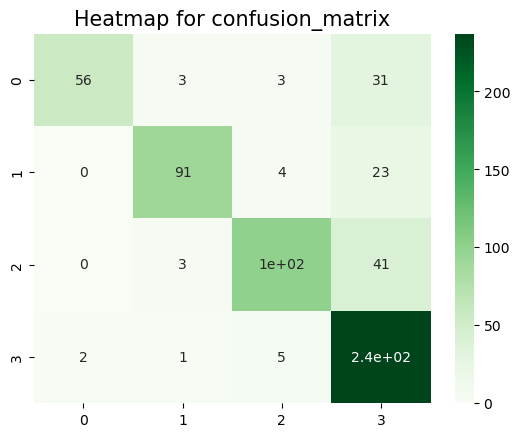

In [80]:
## Naive_bayes

naive_bayes = MultinomialNB()
naive_bayes.fit(x_train , y_train)
## score for naive_bayes
naive_bayes_score = naive_bayes.score(x_train , y_train)
print("naive_bayes_score" , naive_bayes_score)
## y_pred
y_pred_naive_bayes = naive_bayes.predict(x_test)
## accuracy for naive_bayes
accuracy_nb = accuracy_score(y_test , y_pred_naive_bayes)
print("accuracy_nb :" , accuracy_nb)
## classification_report
report = classification_report(y_test , y_pred_naive_bayes)
print("report" , report)
## confusion_matrix
cm_nb = confusion_matrix(y_test , y_pred_naive_bayes)
print("cm_nb :" , cm_nb)
## plot confusion_matrix
sns.heatmap(cm_nb , annot = True , cmap = "Greens")
plt.title("Heatmap for confusion_matrix" , fontsize = 15 , c = "k")
plt.show()

random_forest_score 0.975
accuracy_rf : 0.9133333333333333
report               precision    recall  f1-score   support

           0       0.96      0.87      0.92        93
           1       0.88      0.92      0.90       118
           2       0.95      0.89      0.92       144
           3       0.89      0.94      0.92       245

    accuracy                           0.91       600
   macro avg       0.92      0.91      0.91       600
weighted avg       0.92      0.91      0.91       600

cm_rf : [[ 81   3   2   7]
 [  0 109   0   9]
 [  2   3 128  11]
 [  1   9   5 230]]


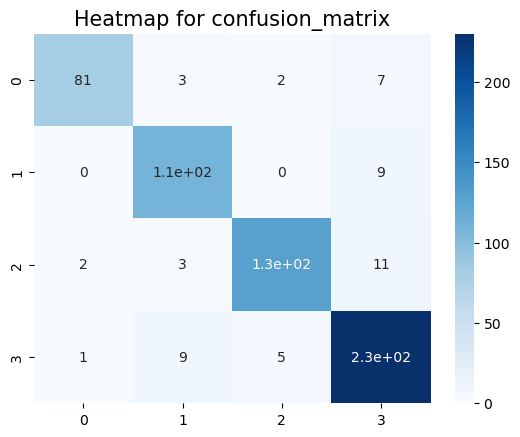

In [85]:
# random forest classifier
random_forest = RandomForestClassifier()
random_forest.fit(x_train , y_train)
random_forest_score = random_forest.score(x_train , y_train)
print("random_forest_score" , random_forest_score)
## y_pred
y_pred_random_forest = random_forest.predict(x_test)
## accuracy for randomforest
accuracy_rf = accuracy_score(y_test , y_pred_random_forest)
print("accuracy_rf :" , accuracy_rf)
## classification_report
report = classification_report(y_test , y_pred_random_forest)
print("report" , report)
## confusion_matrix
cm_rf = confusion_matrix(y_test , y_pred_random_forest)
print("cm_rf :" , cm_rf)
sns.heatmap(cm_rf , annot = True , cmap = "Blues")
plt.title("Heatmap for confusion_matrix" , fontsize = 15 , c = "k")
plt.show()

In [86]:
# Predict Model
def predict_sentiment(Text):
    processed_Text = process_Text(Text)

    # Transform the preprocessed text into CountVectorizer vectors
    X_new = count_vector.transform([processed_Text])

    # Make predictions
    predicted_sentiment = random_forest.predict(X_new)

    # Print the predicted sentiment
    print("Predicted sentiment:", predicted_sentiment)

In [87]:
("i love this film")

'i love this film'

In [88]:
predict_sentiment("i hate you")

Predicted sentiment: [1]


In [89]:
predict_sentiment("office is closed at 12 pm")

Predicted sentiment: [2]
